# A/B тестирование. Отбор гипотез

## Часть I

Имеется 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Импортируем необходимые библиотеки.

In [83]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Прочитаем csv-файл, сохранив его в переменную hyp_df.

In [2]:
hyp_df = pd.read_csv('hypothesis.csv')

Взглянем на данные более подробно. Так как датафрейм имеет небольшой размер, можно визуально оценить адекватность представленных данных и наличие пропусков.

In [3]:
hyp_df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Пропуски отсутствуют. Ошибок, которые можно было бы выявить подобным образом, также не обнаружено. Переименуем колонки для более комфортной работы.

In [4]:
hyp_df.columns = hyp_df.columns.str.lower()

Посмотрим на обновленный DF.

In [5]:
hyp_df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


Выясним, правильно ли указан тип данных.

In [6]:
hyp_df.dtypes

hypothesis    object
reach          int64
impact         int64
confidence     int64
efforts        int64
dtype: object

Тип данных выбраны корректно (целочисленный для всех столбцов). Рассчитаем метрики: приоритет проверки гипотез с помощью методологий ICE и RICE.

In [7]:
hyp_df['ice'] = hyp_df['impact'] * hyp_df['confidence'] / hyp_df['efforts']
hyp_df['rice'] = hyp_df['reach'] * hyp_df['impact'] * hyp_df['confidence'] / hyp_df['efforts']

Отсортируем таблицу по столбцу с рейтингом ICE.

In [8]:
hyp_df['ice'] = hyp_df['ice'].round(1)
hyp_df.sort_values(by='ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


При использовании методологии ICE параметр Reach не учитывается, поэтому на первых трех местах гипотезы номер 8, 0 и 7 соответственно. Все три обладают средним параметром Effort, от 5 до 6 баллов, и высокими показателями Impact и Confidence, от 7 до 10 баллов.

Отсортируем таблицу по столбцу с рейтингом RICE.

In [9]:
hyp_df.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


Картина существенным образом изменилась. На первых трех местах гипотезы 7, 2 и 0 соответственно. При этом ранее гипотезы под номерами 2 и 7 в тройку лидеров не попали. Дело в высоком значении параметра Reach для данных инициатив.

По результатам данного исследования можно сказать, что оценка охвата и его учет в определении приоритетности проверки тех или иных гипотез могут существенным образом повлиять на выбор актуальных гипотез. Охват играет важную роль в введении тех или иных продуктовых изменений, а его корректная оценка является залогом приоритетной обработки наиболее значимых гипотез.

---

## Часть II

Загружаем файлы для второй части исследования.

In [10]:
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

**Orders**

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Взглянем на таблицу с заказами более подробно.

In [11]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Переименуем колонки для большего единообразия. Проверим.

In [12]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проверим правильность выбранных типов данных.

In [13]:
orders.dtypes

transaction_id     int64
visitor_id         int64
date              object
revenue            int64
group             object
dtype: object

Заменим тип данных на datetime64 для столбца с датами совершения покупки. Проверим.

In [14]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.dtypes

transaction_id             int64
visitor_id                 int64
date              datetime64[ns]
revenue                    int64
group                     object
dtype: object

Еще раз посмотрим на предобработанную таблицу.

In [15]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


**Visitors**

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Проверим правильность выбранных типов данных.

In [17]:
visitors.dtypes

date        object
group       object
visitors     int64
dtype: object

Заменим тип данных на datetime64 для столбца с датами совершения покупки. Проверим.

In [18]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

Еще раз посмотрим на предобработанную таблицу.

In [19]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


#### 1. График кумулятивной выручки по группам

In [20]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Сгруппируем исходную таблицу orders по датам и группам. Для каждой пары дата-группа рассчитаем количество покупок, количество уникальных покупателей, выручку. Переименуем колонки в получившейся таблице.

In [21]:
orders_grouped = (orders.groupby(['date', 'group'])
                  .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'})
                  .reset_index())
orders_grouped = orders_grouped.rename(columns={'transaction_id':'order_count', 'visitor_id':'cust_count'})
orders_grouped.head(6)

,date,group,order_count,cust_count,revenue
0,2019-08-01,A,24,20,148579
1,2019-08-01,B,21,20,101217
2,2019-08-02,A,20,19,93822
3,2019-08-02,B,24,23,165531
4,2019-08-03,A,24,24,112473
5,2019-08-03,B,16,16,114248


Рассчитаем кумулятивную выручку по дням отдельно для каждой группы.

In [22]:
orders_grouped['cum_rev'] = orders_grouped.groupby('group')['revenue'].transform(pd.Series.cumsum)
orders_grouped.head(10)

,date,group,order_count,cust_count,revenue,cum_rev
0,2019-08-01,A,24,20,148579,148579
1,2019-08-01,B,21,20,101217,101217
2,2019-08-02,A,20,19,93822,242401
3,2019-08-02,B,24,23,165531,266748
4,2019-08-03,A,24,24,112473,354874
5,2019-08-03,B,16,16,114248,380996
6,2019-08-04,A,16,15,70825,425699
7,2019-08-04,B,17,16,108571,489567
8,2019-08-05,A,25,25,124218,549917
9,2019-08-05,B,23,23,92428,581995


На основе полученных данных создадим два отдельных датафрейма, по одному на каждую группу.

In [23]:
cum_rev_a = orders_grouped[orders_grouped['group'] == 'A']
cum_rev_b = orders_grouped[orders_grouped['group'] == 'B']

Построим график кумулятивной выручки для обеих групп.

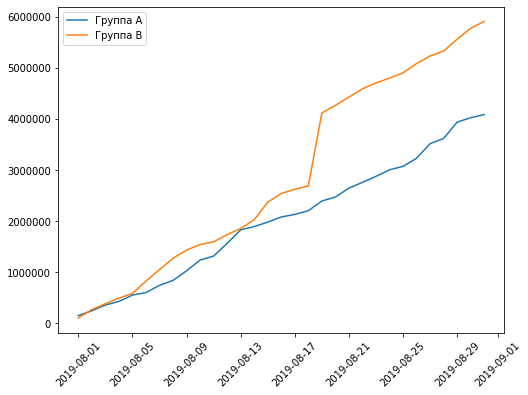

In [24]:
plt.figure(figsize=(8,6))
plt.plot(cum_rev_a['date'], cum_rev_a['cum_rev'], label='Группа A')
plt.plot(cum_rev_b['date'], cum_rev_b['cum_rev'], label='Группа B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

На графике заметно, что со временем отрыв группы B от группы А увеличивается. Впрочем, говорить об однозначном превосходстве группы В над А пока что рано. Необходимо рассчитать и другие метрики, избавиться от выбросов и удостовериться в статистической значимости полученных результатов.

#### 2. График кумулятивного среднего чека по группам

Рассчитаем кумулятивное количество заказов для каждой из групп по дням.

In [25]:
orders_grouped['cum_orders'] = orders_grouped.groupby('group')['order_count'].transform(pd.Series.cumsum)
orders_grouped.head(6)

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders
0,2019-08-01,A,24,20,148579,148579,24
1,2019-08-01,B,21,20,101217,101217,21
2,2019-08-02,A,20,19,93822,242401,44
3,2019-08-02,B,24,23,165531,266748,45
4,2019-08-03,A,24,24,112473,354874,68
5,2019-08-03,B,16,16,114248,380996,61


Средний чек по дням найдем, поделив дневную выручку на дневное количество покупок. 

In [26]:
orders_grouped['avg_order'] = orders_grouped['cum_rev'] / orders_grouped['cum_orders']

На основе полученных данных создадим два отдельных датафрейма, по одному на каждую группу.

In [27]:
avg_order_a = orders_grouped[orders_grouped['group'] == 'A']
avg_order_b = orders_grouped[orders_grouped['group'] == 'B']

Строим графики среднего чека для групп А и В по дням.

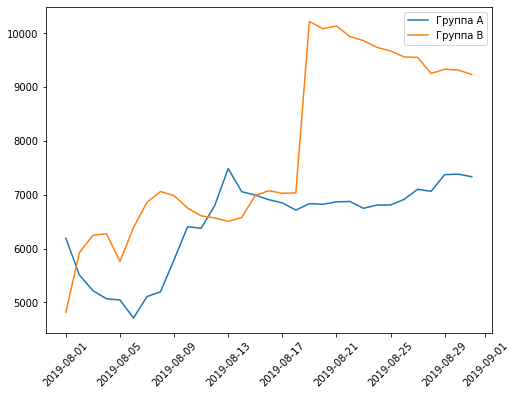

In [28]:
plt.figure(figsize=(8,6))
plt.plot(avg_order_a['date'], avg_order_a['avg_order'], label='Группа A')
plt.plot(avg_order_b['date'], avg_order_b['avg_order'], label='Группа B')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Получается, что группа В может похвастаться не только более высокой выручкой, но и более высоким средним чеком. Возможно, увеличение общей прибыли связано именно с этим параметром — покупки в среднем стали дороже.

#### 3. График относительного изменения кумулятивного среднего чека группы B к группе A

Для построения нужного графика создадим новый DF, в котором будет содержаться информация о среднем чеке на каждую даты для обеих групп.

In [29]:
avg_order = avg_order_a[['date', 'avg_order']].merge(avg_order_b[['date', 'avg_order']], on='date', suffixes=('_a', '_b'))
avg_order.head()

,date,avg_order_a,avg_order_b
0,2019-08-01,6190.791667,4819.857143
1,2019-08-02,5509.113636,5927.733333
2,2019-08-03,5218.735294,6245.836066
3,2019-08-04,5067.845238,6276.500000
4,2019-08-05,5045.110092,5762.326733


Строим график.

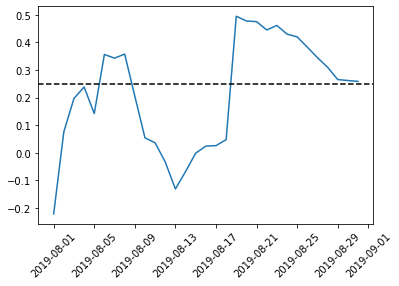

In [30]:
plt.plot(avg_order['date'], avg_order['avg_order_b']/avg_order['avg_order_a'] - 1)
plt.xticks(rotation=45)
plt.axhline(y=0.25, color='black', linestyle='--')
plt.show()

На графике видно, что отношение средних чеков для двух групп существенно различалось в ходе эксперимента. На данный момент средний чек группы В на 25% больше среднего чека группы А.

#### 4. График кумулятивной конверсии по группам. Сделайте выводы и предположения.

Для определения конверсии дополним таблицу orders данными о посещениях из таблицы visitors.

In [31]:
orders_grouped = orders_grouped.merge(visitors, on=['date', 'group'])
orders_grouped.head()

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders,avg_order,visitors
0,2019-08-01,A,24,20,148579,148579,24,6190.791667,719
1,2019-08-01,B,21,20,101217,101217,21,4819.857143,713
2,2019-08-02,A,20,19,93822,242401,44,5509.113636,619
3,2019-08-02,B,24,23,165531,266748,45,5927.733333,581
4,2019-08-03,A,24,24,112473,354874,68,5218.735294,507


Рассчитаем кумулятивную сумму количества посещений для каждой группы.

In [32]:
orders_grouped['cum_visits'] = orders_grouped.groupby('group')['visitors'].transform(pd.Series.cumsum)
orders_grouped.head(6)

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders,avg_order,visitors,cum_visits
0,2019-08-01,A,24,20,148579,148579,24,6190.791667,719,719
1,2019-08-01,B,21,20,101217,101217,21,4819.857143,713,713
2,2019-08-02,A,20,19,93822,242401,44,5509.113636,619,1338
3,2019-08-02,B,24,23,165531,266748,45,5927.733333,581,1294
4,2019-08-03,A,24,24,112473,354874,68,5218.735294,507,1845
5,2019-08-03,B,16,16,114248,380996,61,6245.836066,509,1803


Конверсию рассчитаем как отношение количества заказов к посещениям.

In [33]:
orders_grouped['conversion'] = orders_grouped['cum_orders'] / orders_grouped['cum_visits']
orders_grouped.head()

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders,avg_order,visitors,cum_visits,conversion
0,2019-08-01,A,24,20,148579,148579,24,6190.791667,719,719,0.033380
1,2019-08-01,B,21,20,101217,101217,21,4819.857143,713,713,0.029453
2,2019-08-02,A,20,19,93822,242401,44,5509.113636,619,1338,0.032885
3,2019-08-02,B,24,23,165531,266748,45,5927.733333,581,1294,0.034776
4,2019-08-03,A,24,24,112473,354874,68,5218.735294,507,1845,0.036856


На основании полученных данных создадим два DF, по одному на каждую группу. Построим графики.

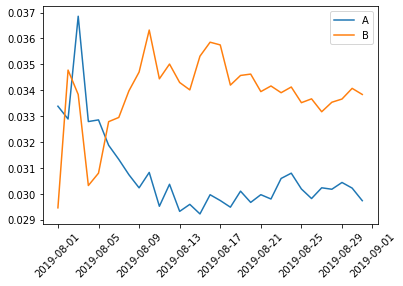

In [34]:
cum_conv_a = orders_grouped[orders_grouped['group'] == 'A']
cum_conv_b = orders_grouped[orders_grouped['group'] == 'B']
plt.plot(cum_conv_a['date'], cum_conv_a['conversion'], label='A')
plt.plot(cum_conv_b['date'], cum_conv_b['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()

Можно говорить о том, что графики стабилизировались после первоначального периода повышенной волатильности. На данный момент конверсия группы А составляет порядка 3,4%, для В — только 3%.

#### 5. График относительного изменения кумулятивной конверсии группы B к группе A

Составим таблицу, в которой на каждый день будет указана кумулятивная конверсия для двух групп.

In [35]:
cum_conv = cum_conv_a[['date', 'conversion']].merge(cum_conv_b[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=('_a', '_b'))
cum_conv.head()

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


Строим график.

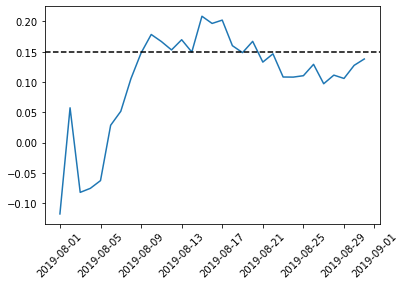

In [36]:
plt.plot(cum_conv['date'], cum_conv['conversion_b']/cum_conv['conversion_a'] - 1)
plt.xticks(rotation=45)
plt.axhline(y=0.15, color='black', linestyle='--')
plt.show()

Конверсия группы В на 15% конверсии группы А.

#### 6. Точечный график количества заказов по пользователям

Сгруппируем таблицу с заказами по ID пользователей. Рассчитаем суммарное количество заказов для каждого из них.

In [37]:
ord_per_cust = orders.groupby('visitor_id')['transaction_id'].count().reset_index()
ord_per_cust.columns = ['visitor_id', 'purch_count']
ord_per_cust.head()

,visitor_id,purch_count
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


Визуально оценим количество покупок, которое приходится на одного покупателя. 

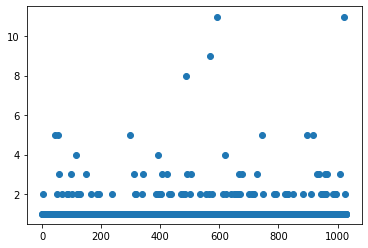

In [38]:
x_cust = pd.Series(range(len(ord_per_cust)))
plt.scatter(x_cust, ord_per_cust['purch_count'])

По графику можно сделать вывод о том, что большинство покупателей совершают всего одну покупку. Определенное, но меньшее, количество клиентов возвращаются чтобы совершить и вторую. Все, что больше двух можно отнести к выбросам. С учетом того, что в таблице больше 1000 уникальных посетителей, количество покупателей с количеством покупок больше двух выглядит незначительным.

#### 7. 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей

In [39]:
anomal_cust = np.percentile(ord_per_cust['purch_count'], [95,99])
anomal_cust

array([2., 4.])

Как и предполагалось, подавляющее большинство покупателей совершает только 1 заказ. В зависимости от выбранной оценки, к выбросам можно отнести всех покупателей с количеством заказов больше 2-х (95 перцентиль) или 4-х (99 перцентиль).

#### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

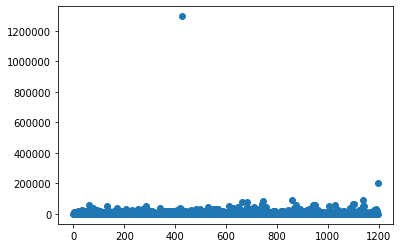

In [40]:
x_rev = pd.Series(range(len(orders)))
plt.scatter(x_rev, orders['revenue'])

Из-за одного аномально высокого значения оценить оставшуюся часть покупок становится сложно. Посмотрим график в большем приближении, ограничив ось ординат значением revenue = 115000.

(0, 115000)

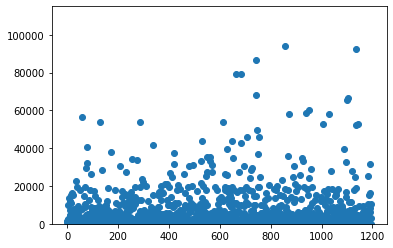

In [41]:
plt.scatter(x_rev, orders['revenue'])
plt.ylim(0,115000)

Значения распределены более равномерно, чем в случае с количеством заказов на одного пользователя. Тем не менее, можно выделить две границы, которые разделяют зоны с разной плотностью точек. Это 20000 и 60000.

#### 9. 95-й и 99-й перцентили стоимости заказов. Выбор границу для определения аномальных заказов

Проверим эти предположения на практике.

In [42]:
anomal_pr = np.percentile(orders['revenue'], [95,99])
anomal_pr

array([28000. , 58233.2])

На самом деле, границы проходят несколько иначе. 95% всех совершенных сделок не превышают 28000 рублей, 99% — 58233 рублей.

#### 10. Статистическая значимость различий в конверсии между группами по «сырым» данным

Создадим таблицу, в которой подсчитаем количество пользователей из группы А, сделавших то или иное количество заказов.

In [43]:
ord_per_cust_a = orders[orders['group'] == 'A'].groupby('visitor_id')['transaction_id'].count().reset_index()
ord_per_cust_a.columns = ['visitor_id', 'purch_count']
ord_per_cust_a['purch_count'].value_counts()

1    473
2     17
3      7
4      3
5      2
7      1
Name: purch_count, dtype: int64

473 человека совершили всего 1 заказ. Больше 2-х заказов совершило только 13 человек.

Проделаем то же для группы В.

In [44]:
ord_per_cust_b = orders[orders['group'] == 'B'].groupby('visitor_id')['transaction_id'].count().reset_index()
ord_per_cust_b.columns = ['visitor_id', 'purch_count']
ord_per_cust_b['purch_count'].value_counts()

1    552
2     23
3      5
4      4
6      1
5      1
Name: purch_count, dtype: int64

Результаты группы В выглядят несколько иначе. 1 заказ здесь совершило уже 552 человека. Больше двух заказов у 11 человек.

Создадим отдельные таблицы с количеством посетителей по дням для каждой группы.

In [45]:
daily_vis_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
daily_vis_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]

Рассчитаем количество посетителей в группах А и В, не совершивших ни одного заказа. Для этого из общего числа посетителей вычтем число покупателей в каждой группе.

In [46]:
no_order_count_a = daily_vis_a['visitors'].sum() - len(ord_per_cust_a)
no_order_count_b = daily_vis_b['visitors'].sum() - len(ord_per_cust_b)
print(no_order_count_a, no_order_count_b)

18233 18330


Создадим небольшую таблицу для сравнения количества покупателей и посетителей в двух группах.

In [47]:
vis_ord_a_b = pd.DataFrame(data={'Просто посмотреть':[no_order_count_a, no_order_count_b],
                                 'Покупатели': [len(ord_per_cust_a), len(ord_per_cust_b)]},
                          index=['A', 'B'])
vis_ord_a_b

,Просто посмотреть,Покупатели
A,18233,503
B,18330,586


Заметно, как при относительно небольшой разнице в количестве посетителей число покупателей в двух группах отличается гораздо значительнее.

Создадим Series из нулей для каждой группы с количеством элементов, равным количеству посетителей без заказов.

In [48]:
no_order_series_a = pd.Series(0, index=np.arange(no_order_count_a), name='orders')
no_order_series_b = pd.Series(0, index=np.arange(no_order_count_b), name='orders')

Соединим полученный Series с таблицей распределения покупателей по количеству заказов для группы А...

In [49]:
all_ord_a = pd.concat([ord_per_cust_a['purch_count'], no_order_series_a], axis=0)
all_ord_a.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
dtype: int64

... и группы В.

In [50]:
all_ord_b = pd.concat([ord_per_cust_b['purch_count'], no_order_series_b], axis=0)
all_ord_b.value_counts()

0    18330
1      552
2       23
3        5
4        4
6        1
5        1
dtype: int64

Наконец, рассчитаем разницу в количестве заказов между группами и ее статистическую значимость с помощью критерия Манна—Уитни. 

Сформулируем гипотезы следующим образом:
- Н0: количество покупок на одного покупателя в группах А и В не различается.
- Н1: количество покупок на одного покупателя в группах А и В различается.

Примем уровень значимости равным 0,05.

In [51]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(all_ord_a, all_ord_b)[1]))
print("Отношение B к A: {0:.3f}".format(all_ord_b.mean()/all_ord_a.mean()-1))

P-value: 0.008
Отношение B к A: 0.138


P-value равно 0,008, ниже уровня значимости. Следовательно, мы имеем достаточно основания для того, чтобы отбросить нулевую гипотезу. Разница в количестве покупок на покупателя между группами действительно есть и составляет порядка 13,8%.

#### 11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Рассчитаем средний чек для групп А и В.

In [52]:
order_a = orders[orders['group'] == 'A']['revenue']

In [53]:
avg_ord_a = orders[orders['group'] == 'A']['revenue'].mean()
round(avg_ord_a, 1)

7333.6

In [54]:
order_b = orders[orders['group'] == 'B']['revenue']

In [55]:
avg_ord_b = orders[orders['group'] == 'B']['revenue'].mean()
round(avg_ord_b, 1)

9230.9

Может сложиться впечатление, что средний чек в двух группах существенно различается, однако сначала это предположение необходимо проверить. Гипотезы формулируем следующим образом:

- Н0: средний чек в группах А и В не различается.
- Н1: средний чек в группах А и В различается.

Уровень значимости: 0,05.

In [56]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(order_a, order_b)[1]))
print("Отношение B к A: {0:.3f}".format(avg_ord_b/avg_ord_a-1))

P-value: 0.365
Отношение B к A: 0.259


Несмотря на существенную разницу в средних значения (более 36%), p-value значительно превышает выбранный уровень значимости. Следовательно, у нас нет оснований для того, чтобы отбросить нулевую гипотезу.

#### 12. Статистическая значимость различий в конверсии между группами по «очищенным» данным

Выявим аномальных покупателей (совершивших более n числа покупок) и очистим список заказов от их сделок.

In [57]:
ord_by_cust = orders.groupby('visitor_id')['transaction_id'].nunique().reset_index()
ord_by_cust.columns = ['visitor_id', 'order_cnt']
ord_by_cust['order_cnt'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: order_cnt, dtype: int64

Напомним, что аномально высокое количество покупок будет больше 2-х или 4-х в зависимости от того, какую часть изначальных данных необходимо отсечь. Выберем границу, проходящую по 99 перцентилю.

In [58]:
np.percentile(ord_per_cust['purch_count'], [95, 99])

array([2., 4.])

Получим список ID этих пользователей.

In [59]:
anomal_cust_id = ord_by_cust[ord_by_cust['order_cnt'] > np.percentile(ord_per_cust['purch_count'], [99])[0]]['visitor_id']
len(anomal_cust_id)

10

Исключим из таблицы orders все сделки, совершенные этими людьми. Посчитаем количество оставшихся наблюдений.

In [60]:
clean_orders = orders[~orders['visitor_id'].isin(anomal_cust_id)]
len(clean_orders)

1128

Напомним себе, какие значения являются пограничными для аномально крупных сделок.

In [61]:
np.percentile(orders['revenue'], [95,99])

array([28000. , 58233.2])

Это 28 000 и 58 233 для 95 и 99 перцентиля соответственно. Очистим DF от этих значений. Посчитаем количество оставшихся наблюдений.

In [62]:
clean_orders = clean_orders[clean_orders['revenue'] < np.percentile(orders['revenue'], [99][0])]
len(clean_orders)

1116

Сгруппируем очищенную таблицу по датам и группам.

In [63]:
orders_grouped_clean = (clean_orders.groupby(['date', 'group'])
                      .agg({'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'})
                      .reset_index())
orders_grouped_clean = orders_grouped_clean.rename(columns={'transaction_id':'order_count', 'visitor_id':'cust_count'})
orders_grouped_clean.head(6)

,date,group,order_count,cust_count,revenue
0,2019-08-01,A,23,19,142779
1,2019-08-01,B,19,19,78258
2,2019-08-02,A,20,19,93822
3,2019-08-02,B,23,22,162043
4,2019-08-03,A,24,24,112473
5,2019-08-03,B,16,16,114248


Рассчитаем кумулятивную сумму для выручки.

In [64]:
orders_grouped_clean['cum_rev'] = orders_grouped_clean.groupby('group')['revenue'].transform(pd.Series.cumsum)
orders_grouped_clean.head(6)

,date,group,order_count,cust_count,revenue,cum_rev
0,2019-08-01,A,23,19,142779,142779
1,2019-08-01,B,19,19,78258,78258
2,2019-08-02,A,20,19,93822,236601
3,2019-08-02,B,23,22,162043,240301
4,2019-08-03,A,24,24,112473,349074
5,2019-08-03,B,16,16,114248,354549


Рассчитаем кумулятивную сумму для количества заказов.

In [65]:
orders_grouped_clean['cum_orders'] = orders_grouped_clean.groupby('group')['order_count'].transform(pd.Series.cumsum)
orders_grouped_clean.head(6)

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders
0,2019-08-01,A,23,19,142779,142779,23
1,2019-08-01,B,19,19,78258,78258,19
2,2019-08-02,A,20,19,93822,236601,43
3,2019-08-02,B,23,22,162043,240301,42
4,2019-08-03,A,24,24,112473,349074,67
5,2019-08-03,B,16,16,114248,354549,58


Добавим информацию о посещениях, присоединив к рассматриваемому DF таблицу visitors.

In [66]:
orders_grouped_clean = orders_grouped_clean.merge(visitors, on=['date', 'group'])
orders_grouped_clean.head(6)

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders,visitors
0,2019-08-01,A,23,19,142779,142779,23,719
1,2019-08-01,B,19,19,78258,78258,19,713
2,2019-08-02,A,20,19,93822,236601,43,619
3,2019-08-02,B,23,22,162043,240301,42,581
4,2019-08-03,A,24,24,112473,349074,67,507
5,2019-08-03,B,16,16,114248,354549,58,509


Рассчитаем кумулятивную сумму для посещений.

In [67]:
orders_grouped_clean['cum_visits'] = orders_grouped_clean.groupby('group')['visitors'].transform(pd.Series.cumsum)
orders_grouped_clean.head(6)

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders,visitors,cum_visits
0,2019-08-01,A,23,19,142779,142779,23,719,719
1,2019-08-01,B,19,19,78258,78258,19,713,713
2,2019-08-02,A,20,19,93822,236601,43,619,1338
3,2019-08-02,B,23,22,162043,240301,42,581,1294
4,2019-08-03,A,24,24,112473,349074,67,507,1845
5,2019-08-03,B,16,16,114248,354549,58,509,1803


На основе кумулятивных данных рассчитаем конверсию, поделив количество заказов на количество посещений.

In [68]:
orders_grouped_clean['conversion'] = orders_grouped_clean['cum_orders'] / orders_grouped_clean['cum_visits']
orders_grouped_clean.head()

,date,group,order_count,cust_count,revenue,cum_rev,cum_orders,visitors,cum_visits,conversion
0,2019-08-01,A,23,19,142779,142779,23,719,719,0.031989
1,2019-08-01,B,19,19,78258,78258,19,713,713,0.026648
2,2019-08-02,A,20,19,93822,236601,43,619,1338,0.032138
3,2019-08-02,B,23,22,162043,240301,42,581,1294,0.032457
4,2019-08-03,A,24,24,112473,349074,67,507,1845,0.036314


Рассчитаем количество заказов на одного покупателя в группе А...

In [69]:
ord_per_cust_a_clean = clean_orders[clean_orders['group'] == 'A'].groupby('visitor_id')['transaction_id'].count().reset_index()
ord_per_cust_a_clean.columns = ['visitor_id', 'purch_count']
ord_per_cust_a_clean['purch_count'].value_counts()

1    463
2     17
3      6
Name: purch_count, dtype: int64

... и группе В.

In [70]:
ord_per_cust_b_clean = clean_orders[clean_orders['group'] == 'B'].groupby('visitor_id')['transaction_id'].count().reset_index()
ord_per_cust_b_clean.columns = ['visitor_id', 'purch_count']
ord_per_cust_b_clean['purch_count'].value_counts()

1    545
2     22
3      4
Name: purch_count, dtype: int64

Уже сейчас заметно, что между двумя группами есть заметная разница. Действительно ли между ними есть статистически значимая разница — это узнаем только после проведения теста. Повторим действия, описанные выше: создадим Series с нулями, чтобы дополнить таблицу с информацией о количестве пользователей с тем или иным количеством заказов.

In [71]:
daily_vis_a_clean = visitors[visitors['group'] == 'A'][['date', 'visitors']]
daily_vis_b_clean = visitors[visitors['group'] == 'B'][['date', 'visitors']]

In [72]:
no_order_count_a_clean = daily_vis_a_clean['visitors'].sum() - len(ord_per_cust_a_clean)
no_order_count_b_clean = daily_vis_b_clean['visitors'].sum() - len(ord_per_cust_b_clean)

Создадим таблицу с данными об общем количестве покупателей и посетителей в каждой группе (уже на основе очищенных данных).

In [73]:
vis_ord_a_b_clean = pd.DataFrame(data={'Просто посмотреть':[no_order_count_a_clean, no_order_count_b_clean],
                                 'Покупатели': [len(ord_per_cust_a_clean), len(ord_per_cust_b_clean)]},
                          index=['A', 'B'])
vis_ord_a_b_clean

,Просто посмотреть,Покупатели
A,18250,486
B,18345,571


Дополним данные нулями для тех посетителей, которые не совершили ни одной покупки.

In [74]:
no_order_series_a_clean = pd.Series(0, index=np.arange(no_order_count_a_clean), name='orders')
no_order_series_b_clean = pd.Series(0, index=np.arange(no_order_count_b_clean), name='orders')

Создадим объединенный Series для А...

In [75]:
all_ord_a_clean = pd.concat([ord_per_cust_a_clean['purch_count'], no_order_series_a_clean], axis=0)
all_ord_a_clean.value_counts()

0    18250
1      463
2       17
3        6
dtype: int64

... и В.

In [76]:
all_ord_b_clean = pd.concat([ord_per_cust_b_clean['purch_count'], no_order_series_b_clean], axis=0)
all_ord_b_clean.value_counts()

0    18345
1      545
2       22
3        4
dtype: int64

Проверим, действительно ли между группами присутствует статистически значимая разница по количеству заказов на одного покупателя. Сформулируем гипотезы:

Сформулируем гипотезы следующим образом:

- Н0: количество покупок на одного покупателя в группах А и В не различается.
- Н1: количество покупок на одного покупателя в группах А и В различается.

Примем уровень значимости равным 0,05.

In [77]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(all_ord_a_clean, all_ord_b_clean)[1]))
print("Отношение B к A: {0:.3f}".format(all_ord_b_clean.mean()/all_ord_a_clean.mean()-1))

P-value: 0.006
Отношение B к A: 0.156


P-value ниже уровня значимости. Значит, мы можем отбросить нулевую гипотезу и с уверенностью утверждать, что разница между группами реальна и составляет порядка 15,6%. Пользователи из группы В действительно совершают больше покупок в расчете на одного покупателя.

#### 13. Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проделаем те же шаги, что и для сырых данных, но с уже очищенным DF.

In [78]:
order_a_clean = clean_orders[clean_orders['group'] == 'A']['revenue']

In [79]:
avg_ord_a_clean = clean_orders[clean_orders['group'] == 'A']['revenue'].mean()
round(avg_ord_a_clean, 1)

6492.7

Средний чек группы А по очищенным данным равен 6 493 рублей.

In [80]:
order_b_clean = clean_orders[clean_orders['group'] == 'B']['revenue']

In [81]:
avg_ord_b_clean = clean_orders[clean_orders['group'] == 'B']['revenue'].mean()
round(avg_ord_b_clean, 1)

6391.4

В группе В этот показатель равен 6 391.

In [82]:
print("P-value: {0:.3f}".format(stats.mannwhitneyu(order_a_clean, order_b_clean)[1]))
print("Отношение B к A: {0:.3f}".format(avg_ord_b_clean/avg_ord_a_clean-1))

P-value: 0.491
Отношение B к A: -0.016


Разница между средним чеком для групп А и В в данном случае гораздо менее существенна, чем по результатам анализа "сырых" данных. P-value гораздо больше уровня значимости. Нет оснований для того, чтобы отвергать нулевую гипотезу. Следовательно, можно считать, что статистически значимой разницы между средним чеком в двух группах нет.

## Вывод

Какое из доступных решений выбрать?

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

A/B тест можно остановить, признав победу группы В. На то, что тест можно остановить, указывает выравнивание выручки, среднего чека и конверсии для обеих групп. Продолжение эксперимента, скорее всего, не повлияет на результат, так как основные метрики останутся на том же уровне, что и сейчас.

Несмотря на то, что статистически значимой разницы между средним чеком групп А и В не выявлено, группа В в целом оказалось более успешной по причине более высокого количества повторных покупок. Пользователи из группы В на 15,6% чаще совершали повторные покупки, чем пользователи из группы А.